In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1,x2):

    return np.sqrt(np.sum(x1-x2)**2)

class Kmeans:

    def __init__(self,K=5,max_iters=100,plot_steps=False):

        self.K = K
        self.max_iters = max_iters
        self.plot_steps=plot_steps

        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []


    def predict(self,X):
        self.X = X

        self.n_samples,self.n_features = X.shape
        random_choice = np.random.choice(self.n_samples,self.K,replace=False)
        self.centroids = [self.X[idx] for idx in random_choice]

        for _ in range(self.max_iters):

            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old,self.centroids):
                break

            if self.plot_steps:
                self.plot()

        return self.get_cluster_labels(self.clusters)



    def _create_clusters(self,centroids):
        clusters = [[] for _ in range(self.K)]

        for idx,sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample,self.centroids)
            clusters[centroid_idx].append(idx)

        return clusters

    def _closest_centroid(self,sample,centroids):

        distances = [euclidean_distance(sample,centroid) for centroid in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self,clusters):

        centroids = np.zeros((self.K,self.n_features))
        for cluster_idx,cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster],axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self,centroids_old,centroids_new):

        distances = [euclidean_distance(centroids_old[i],centroids_new[i]) for i in range(self.K)]
        return  sum(distances)==0

    def get_cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)

        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels

    def plot(self):
        fig,ax = plt.subplots(figsize=(12,8))

        for i,index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point,marker="x",color="black",linewidth=2)

        plt.show()






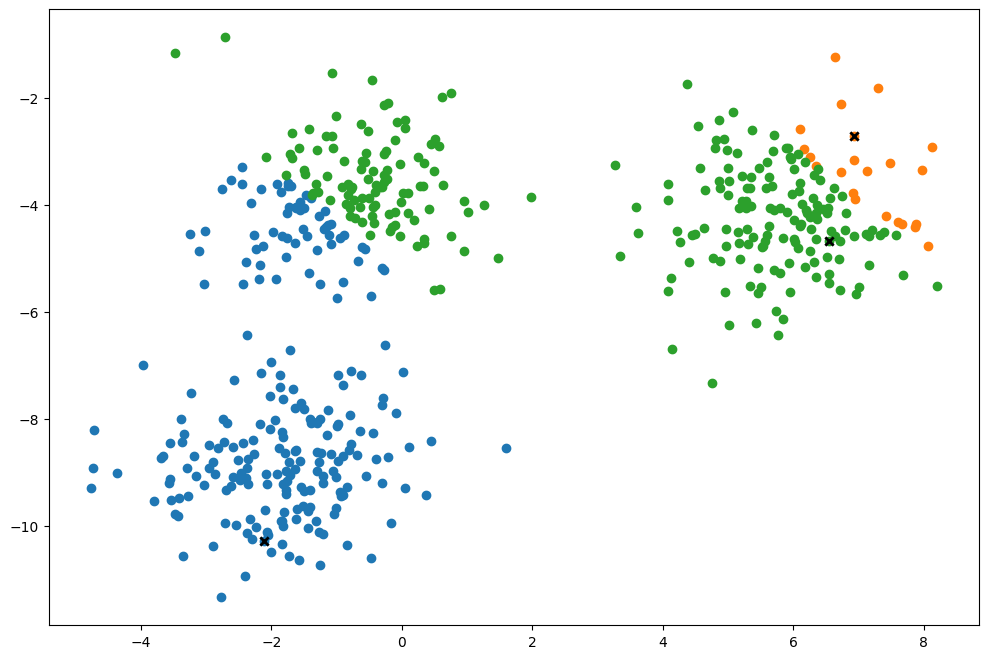

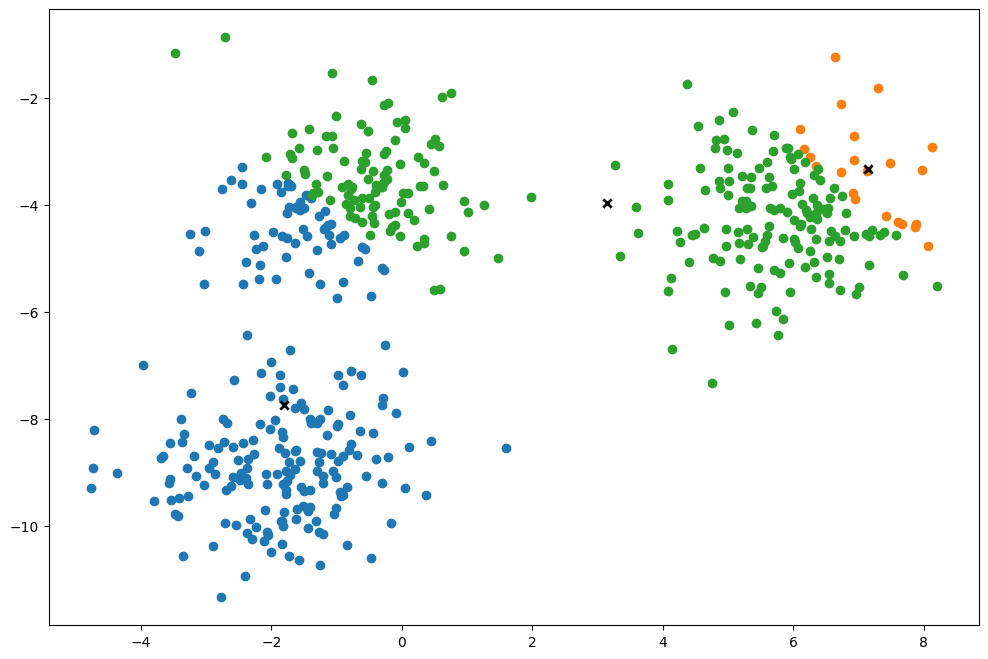

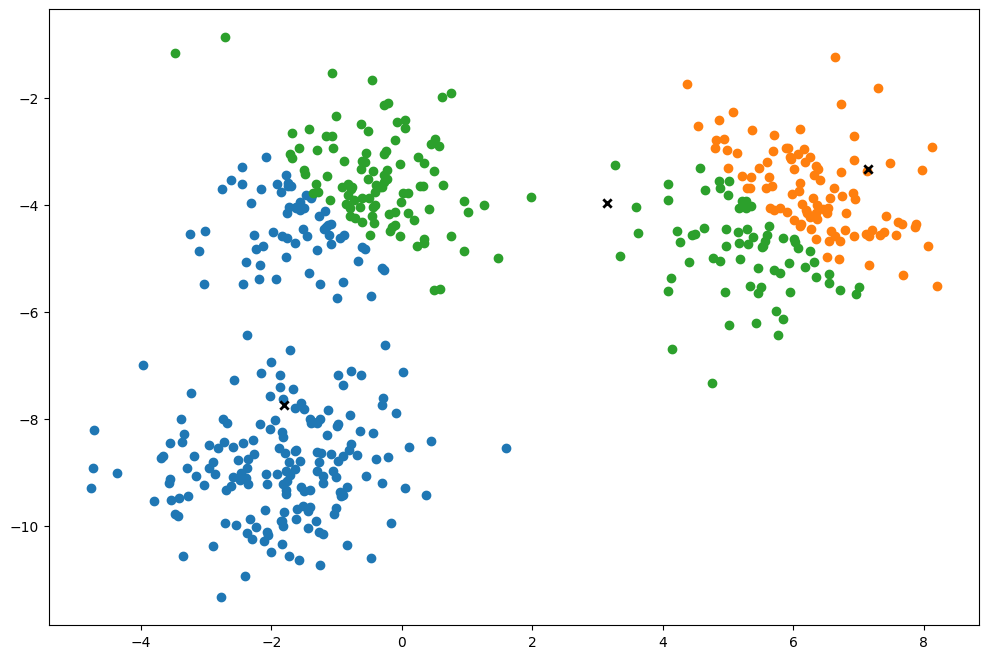

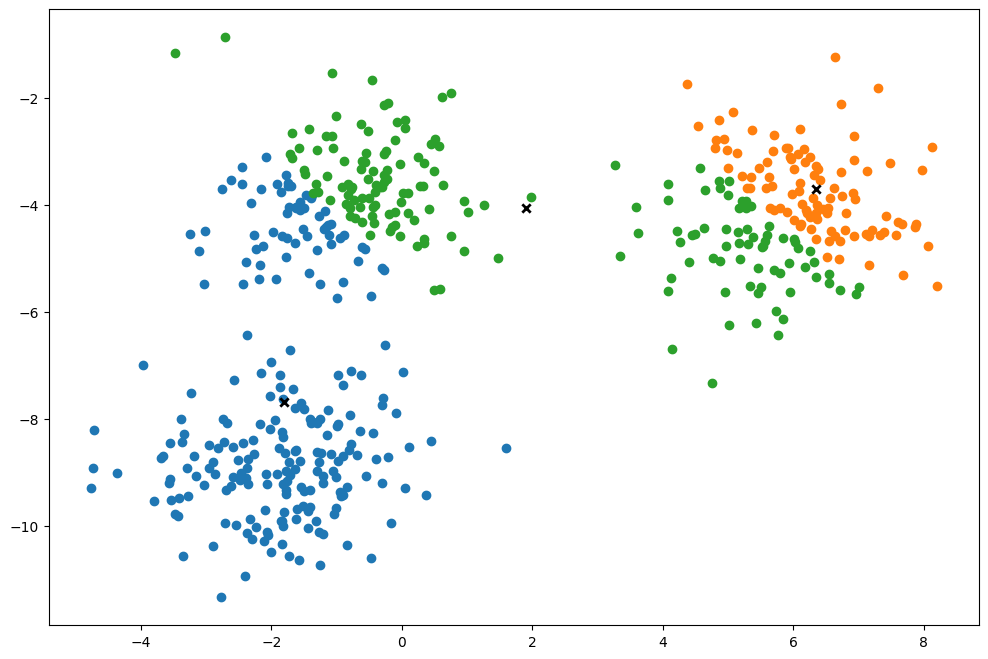

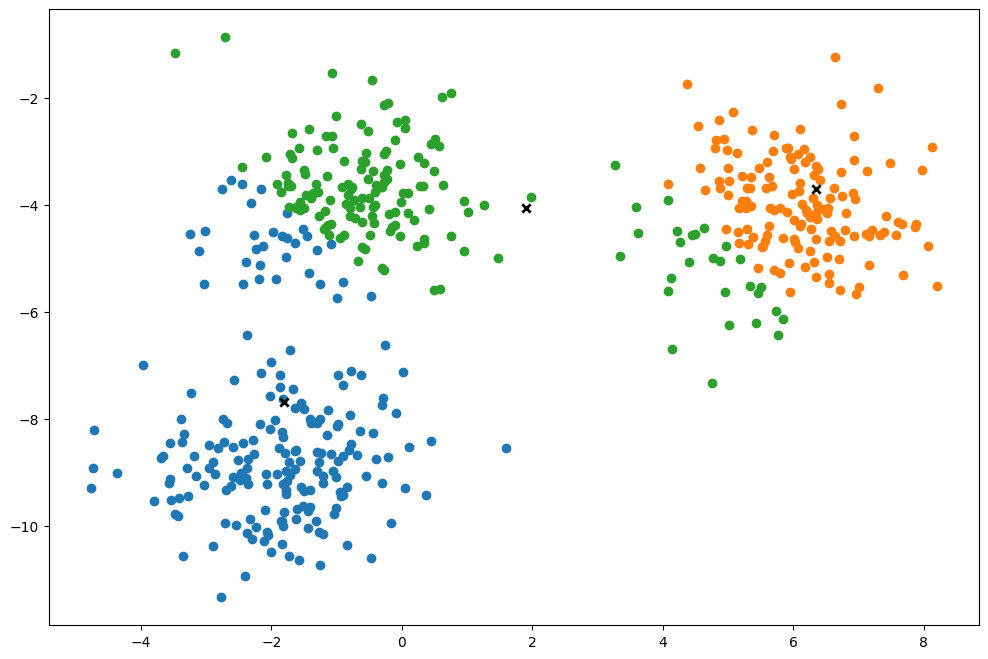

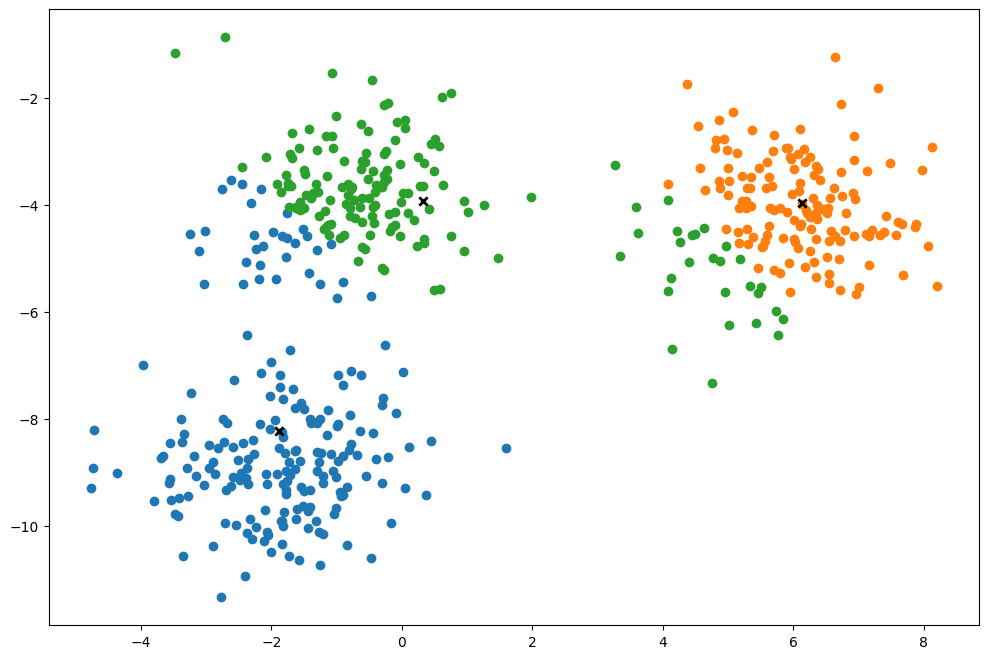

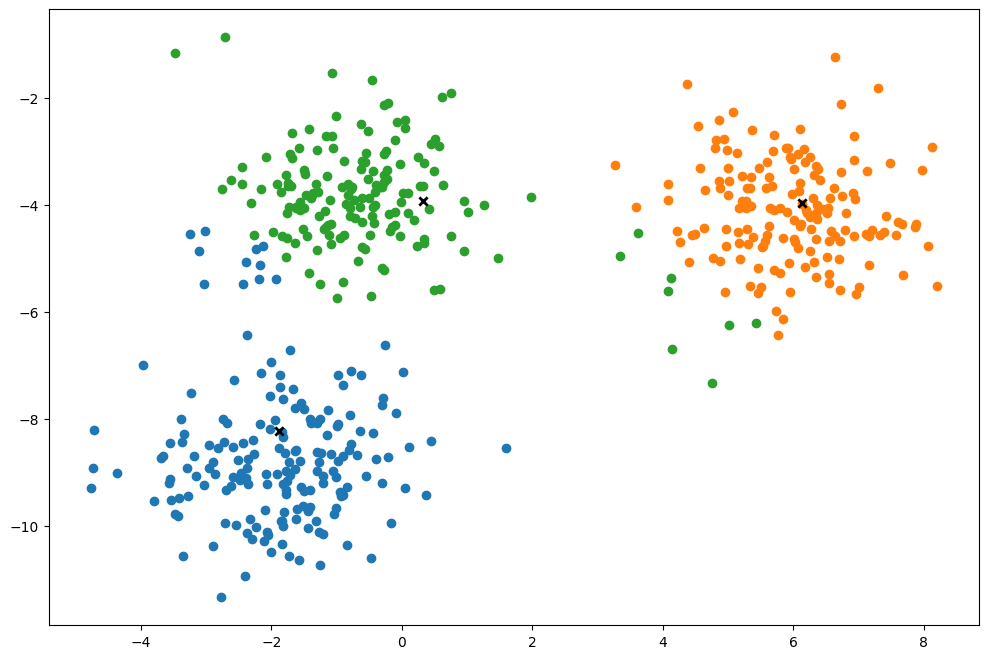

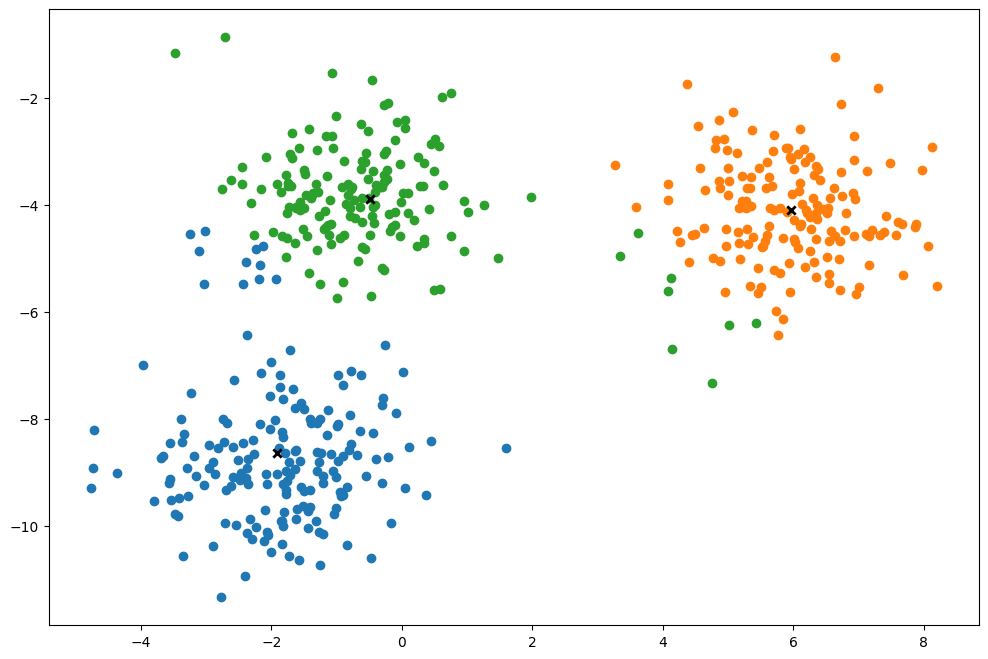

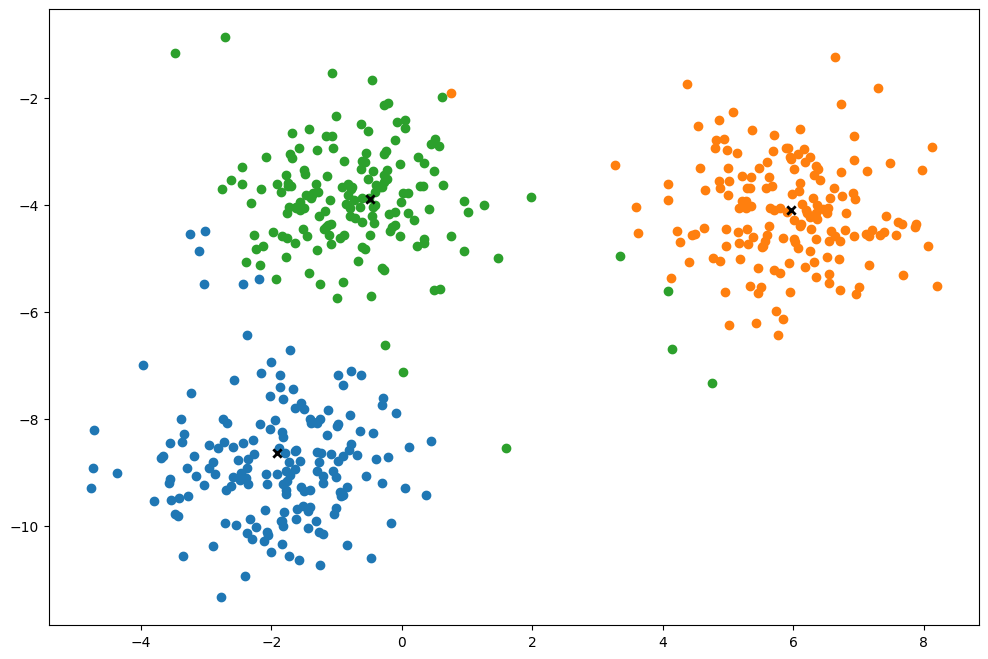

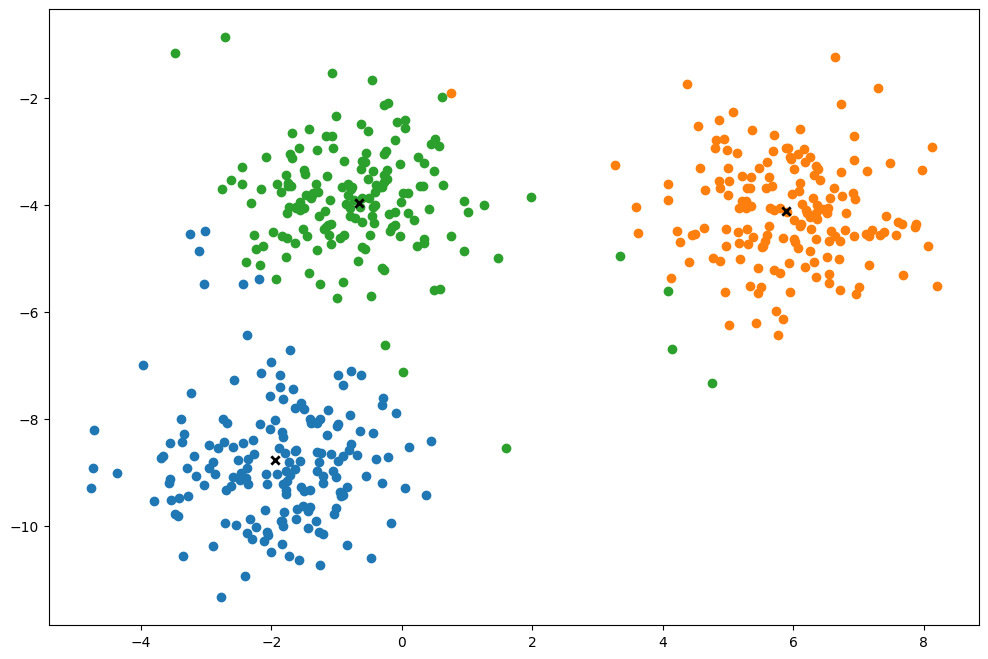

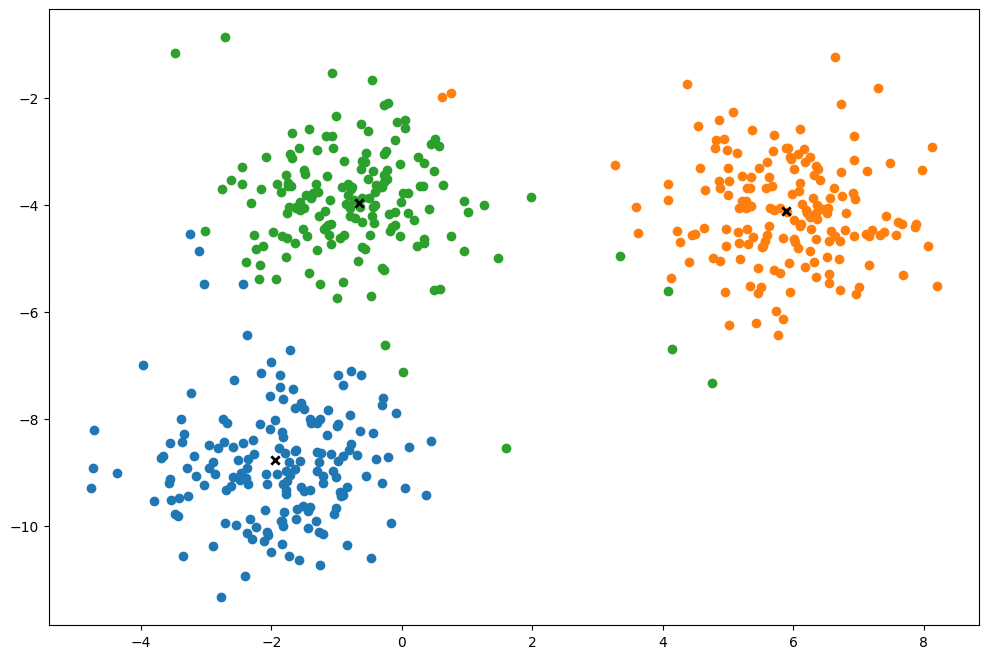

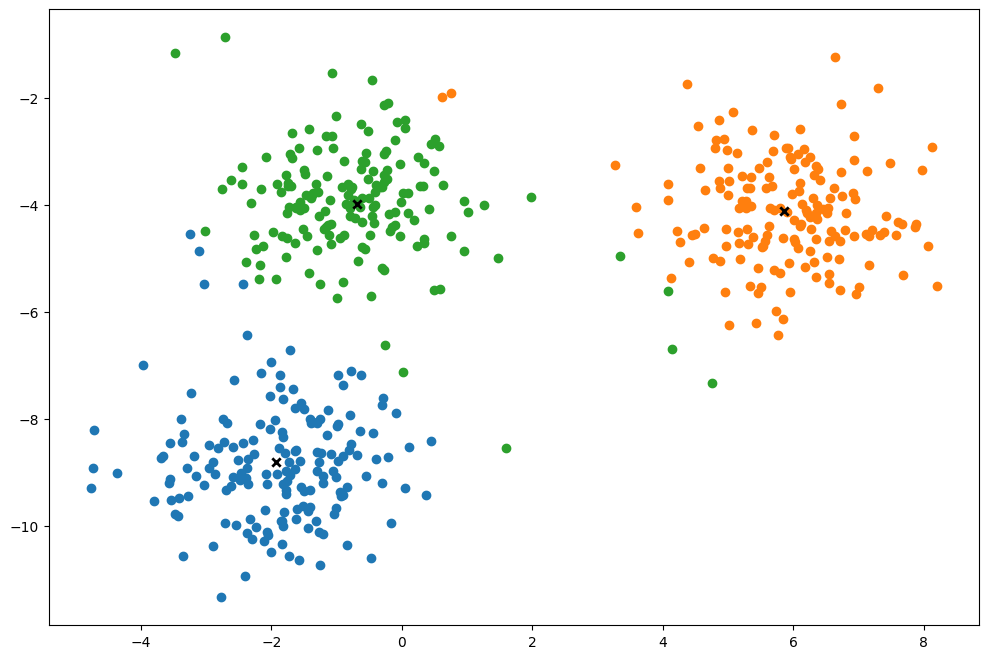

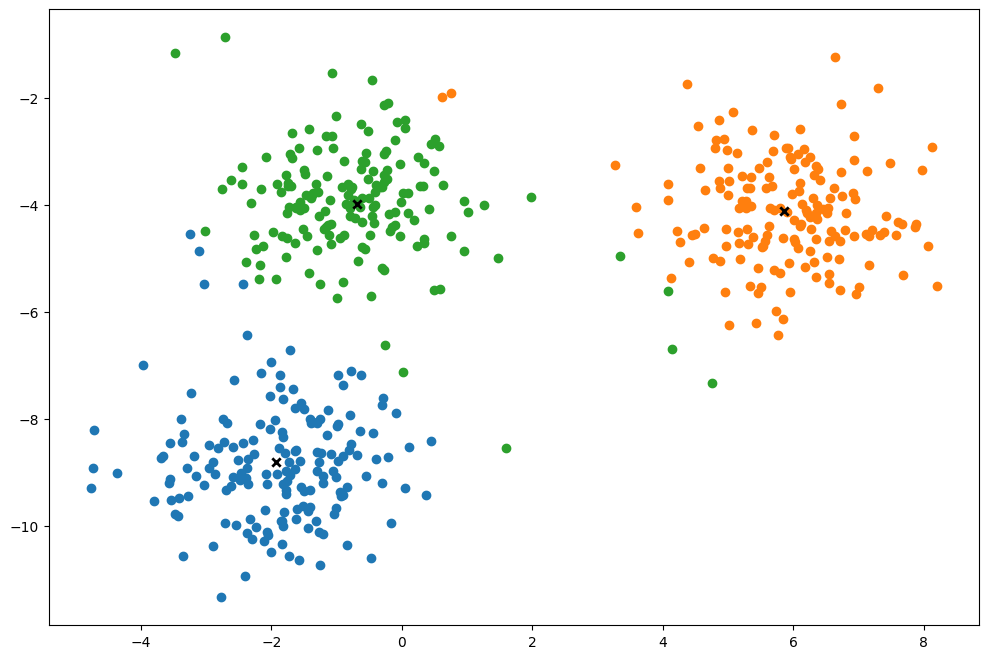

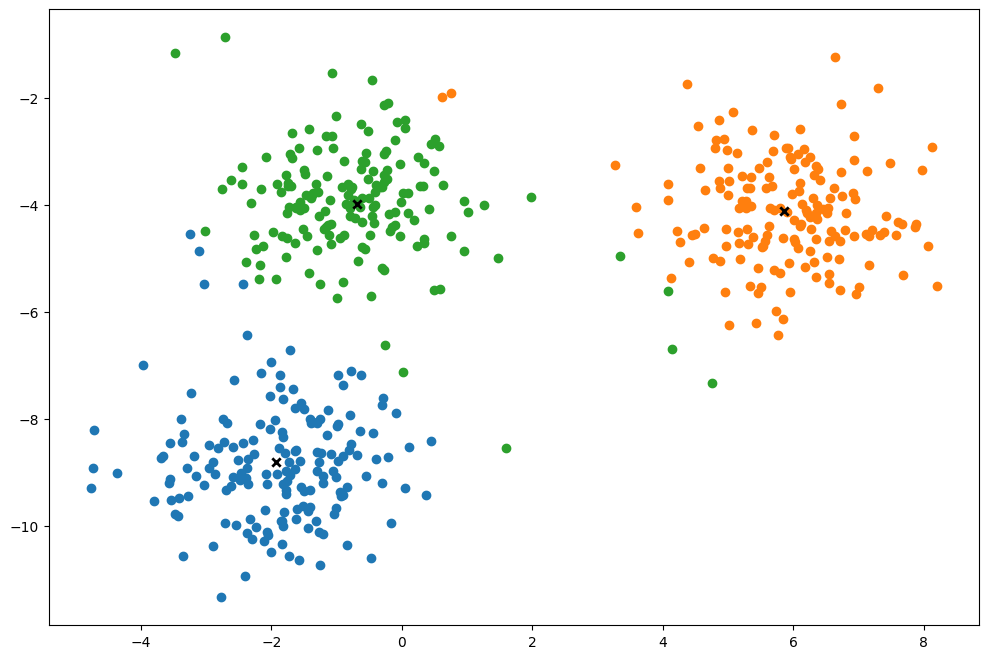

In [3]:
from sklearn.datasets import make_blobs

X,y = make_blobs(
    centers=3,
    n_samples=500,
    n_features=2,
    shuffle=True,
    random_state=40)

clusters = len(np.unique(y))

kmeans = Kmeans(K=clusters,max_iters=150,plot_steps=True)
y_pred = kmeans.predict(X)

kmeans.plot()